Importing Dependencies

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score 

In [36]:
# Load data set
df=pd.read_csv("/content/creditcard.csv")

In [37]:
# Display first five rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [38]:
df.shape

(284807, 31)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [40]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [32]:
# count the fraud and not fraud trasection
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

0 --> Not fraud

1 --> Fraud

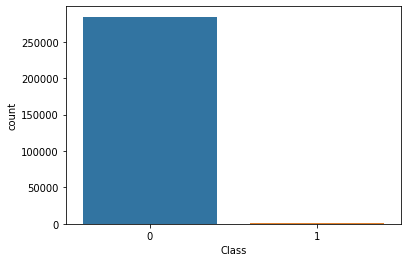

In [41]:
sns.countplot(x='Class', data=df)   

In [53]:
# Seperating data of legit and fraud transaction
legit=df[df.Class==0]
fraud=df[df.Class==1]

In [55]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [56]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [57]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [58]:
# Compare the vaules of both transections
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


**Under-Sampling**

Fraud transections are 492 so select similar legit transections

In [59]:
legit_sample=legit.sample(n=492)

In [60]:
df_new=pd.concat([legit_sample, fraud], axis=0)

In [62]:
df_new.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
62471,50279.0,0.897028,0.019199,1.431631,2.375040,0.096981,2.520659,-0.978550,0.896562,-0.207554,...,0.087654,0.535566,0.157516,-1.009604,-0.037478,0.066787,0.112307,0.011357,0.00,0
169152,119556.0,2.024487,-1.066916,0.233506,-0.413657,-1.584377,-0.348847,-1.330210,-0.039552,0.119953,...,-0.095977,0.270605,0.283540,-0.078651,-0.674639,0.600450,0.021704,-0.021767,45.90,0
2006,1548.0,-1.559446,1.425546,0.812589,-1.129381,0.507528,0.183507,0.654304,0.088059,0.480018,...,-0.283995,-0.413642,-0.234995,-0.789509,0.324851,0.419737,0.329608,0.351346,5.00,0
263478,160977.0,-2.155552,-2.835415,-1.495354,0.044108,-1.477895,-0.250624,-1.240991,0.393195,-1.624842,...,-0.360594,0.772208,1.989993,0.628263,-0.993101,0.097130,-0.312450,0.423588,188.00,0
35350,38083.0,-0.472155,1.014963,1.674187,-0.101078,-0.098507,-0.681511,0.628675,0.053870,-0.704511,...,-0.159315,-0.425892,-0.008182,0.522434,-0.243034,0.040287,0.262704,0.113482,4.49,0


In [63]:
df_new.shape

(984, 31)

In [64]:
df_new['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [67]:
# Seperating data features and target
X=df_new.drop('Class', axis=1)
Y=df_new['Class']

In [70]:
print(X.head())
print(Y.head())

            Time        V1        V2        V3        V4        V5        V6  \
62471    50279.0  0.897028  0.019199  1.431631  2.375040  0.096981  2.520659   
169152  119556.0  2.024487 -1.066916  0.233506 -0.413657 -1.584377 -0.348847   
2006      1548.0 -1.559446  1.425546  0.812589 -1.129381  0.507528  0.183507   
263478  160977.0 -2.155552 -2.835415 -1.495354  0.044108 -1.477895 -0.250624   
35350    38083.0 -0.472155  1.014963  1.674187 -0.101078 -0.098507 -0.681511   

              V7        V8        V9  ...       V20       V21       V22  \
62471  -0.978550  0.896562 -0.207554  ... -0.272112  0.087654  0.535566   
169152 -1.330210 -0.039552  0.119953  ... -0.407672 -0.095977  0.270605   
2006    0.654304  0.088059  0.480018  ...  0.451195 -0.283995 -0.413642   
263478 -1.240991  0.393195 -1.624842  ... -1.544090 -0.360594  0.772208   
35350   0.628675  0.053870 -0.704511  ...  0.119465 -0.159315 -0.425892   

             V23       V24       V25       V26       V27       V28  

In [71]:
# train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=2)

In [72]:
print(X_train.shape)
print(X_test.shape)

(787, 30)
(197, 30)


Training the model

In [74]:
model=LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [75]:
# Training data accuaracy
X_train_prediction=model.predict(X_train)
training_accuaracy=accuracy_score(X_train_prediction, Y_train)

In [76]:
training_accuaracy

0.9440914866581956

In [78]:
# Test data accuaracy
X_test_prediction= model.predict(X_test)
test_accuaracy=accuracy_score(X_test_prediction,Y_test)

In [79]:
test_accuaracy

0.949238578680203

Build a predictive model

In [85]:
input=(1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66)
input_data=np.asarray(input)
input_data_reshape=input_data.reshape(1, -1)
prediction=model.predict(input_data_reshape)
print(prediction)

[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


In [87]:
if (prediction[0]==1):
  print('Fraud transaction')
else:
  print("legit transaction")

legit transaction
